In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_location="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


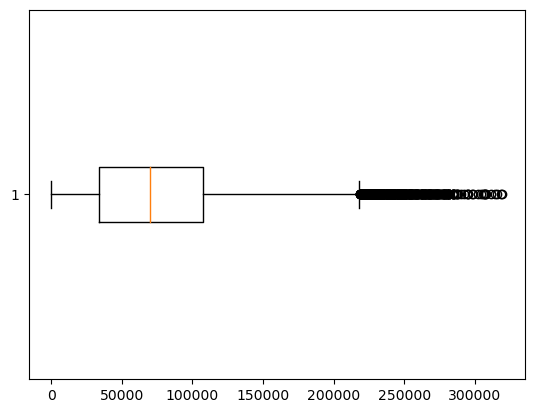

In [5]:
plt.boxplot(visa_df['prevailing_wage'],vert=0)
plt.show()
#median line-orange
#black dot

**procedure to find outliers**

In [ ]:
- step1:
    - caluculate q1 q2 and q3
- step2:
    - calculate IQR=(Q3-Q1)
- step3:   
    - calculate upper bound=q3+1.5*IQR
    - Calculate lower bound=q1-1.5*IQR
-step4:
    - find outlier which are having greater than uB
    - find the outlier which are having less than LB

In [ ]:
#STEP1
Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.50)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)

#STEP2
IQR=Q3-Q1

#STEP3
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
UB,LB
#STEP4
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers_df=visa_df[con1|con2]


In [17]:
def outliers(cols):
    Q1=np.quantile(visa_df[cols],0.25)
    Q2=np.quantile(visa_df[cols],0.50)
    Q3=np.quantile(visa_df[cols],0.75)
    IQR=Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    UB,LB
    con1=visa_df[cols]>UB
    con2=visa_df[cols]<LB
    outliers_df=visa_df[con1|con2]
    print(f' {cols} has: {len(outliers_df)} outliers')
    print('{} has outliers'.format(cols))
num_cols=visa_df.select_dtypes(exclude='object').columns
for cols  in num_cols:
    outliers(cols)

 no_of_employees has: 1556 outliers
 yr_of_estab has: 3260 outliers
 prevailing_wage has: 427 outliers


In [10]:
Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.50)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
UB,LB
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers_df=visa_df[con1|con2]
    
    ###non outliers#########
con11=visa_df['prevailing_wage']<UB
con22=visa_df['prevailing_wage']>LB
non_outliers_df=visa_df[con11&con22]

In [11]:
len(non_outliers_df),len(outliers_df)

(25053, 427)

In [12]:
len(non_outliers_df)+len(outliers_df)

25480

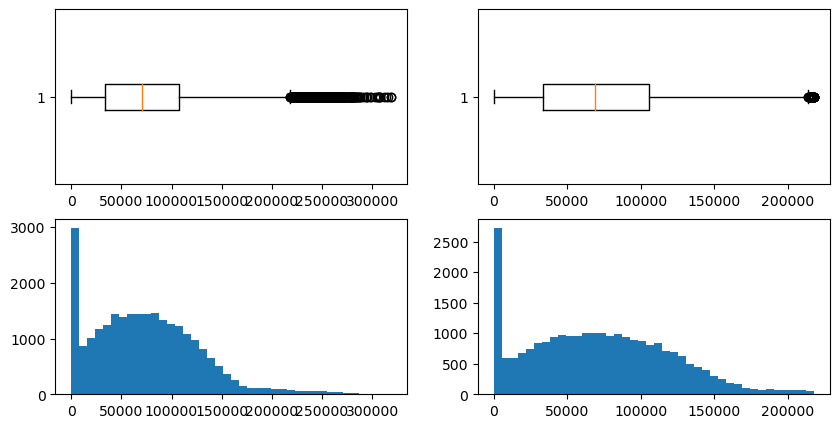

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.boxplot(visa_df['prevailing_wage'],vert=0)
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['prevailing_wage'],vert=0)
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.show()

**how to deal with outliers**
- drop the outliers
  - if you have very huge data
  - and the outliers percentage is<2, then drop the outliers
  - drop the outliers means , we are removing some rows all the columns
  - in the above example total count=25480, outliers are=427 , 427*100/25480
  - after removing 427 observations we have 25053 observation(98% of data)
- impute(Fill) the outliers with median value
  - we already know that outliers doesnot affect median value
  - so if ypo dont want to loss the data, and you want to fill the outliers then use median
- impute(Fill) with UB and LB values(capping)
  - fill the outliers with UB value, which are having >UB
  - fill the outliers with LB value, which are having<LB

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_location="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [9]:
Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.50)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
UB,LB
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers_df=visa_df[con1|con2]
    
    ###non outliers#########
con11=visa_df['prevailing_wage']<UB
con22=visa_df['prevailing_wage']>LB
non_outliers_df=visa_df[con11&con22]

In [10]:
len(non_outliers_df),len(outliers_df)

(25053, 427)

In [11]:
visa_df[['prevailing_wage']].median()

prevailing_wage    70308.21
dtype: float64

In [18]:
outliers_df['prevailing_wage']=visa_df[['prevailing_wage']].median()
modified_data=outliers_df
modified_data

C:\Users\hp\AppData\Local\Temp\ipykernel_5672\3453608913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['prevailing_wage']=visa_df[['prevailing_wage']].median()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,NaN,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,NaN,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,NaN,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,NaN,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,NaN,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,NaN,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,NaN,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,NaN,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,NaN,Year,N,Certified


In [ ]:
d1-pd.DataFrame()
d1['Age']

In [19]:
#now we have non_outliers_df and modified_data
pd.merge(non_outliers_df,modified_data,how="outer")

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,NaN,Year,Y,Denied
25476,EZYV25196,North America,Master's,Y,N,47,2001,South,NaN,Year,N,Certified
25477,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,NaN,Year,N,Certified
25478,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,NaN,Year,N,Certified


In [25]:
final_df=pd.concat([non_outliers_df,modified_data])
final_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,NaN,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,NaN,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,NaN,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,NaN,Year,N,Certified


In [ ]:
plt.bxplot(final_df)

In [ ]:
**np where**

In [6]:
d1=pd.DataFrame()
d1['Name']=['Ramsh','Suresh','Sathish']
d1['Age']=[24,30,32]
con1=d1['Age']>25


d1['Age']=np.where(con1,300,d1['Age'])
d1

,Name,Age
0,Ramsh,24
1,Suresh,300
2,Sathish,300


{'whiskers': [<matplotlib.lines.Line2D at 0x21a32a5d5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21a3295ee10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a32a49d90>],
 'medians': [<matplotlib.lines.Line2D at 0x21a32a68610>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a32a69010>],
 'means': []}

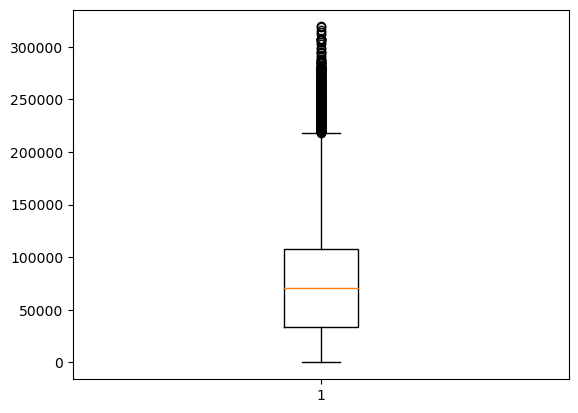

In [10]:
Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.50)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
UB,LB
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
con=con1|con2

med=visa_df['prevailing_wage'].median()
visa_df['prevaling_wage']=np.where(con,med,visa_df['prevailing_wage'])
plt.boxplot(visa_df['prevailing_wage'])  